# Did instructors’ use of comments increase after COVID? did the average length of their comments differ?

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/jenny/remote_learning_code_Spring_2017-2020')
from utils import parse_args


sys.argv = ['-f']
args = parse_args()

term_20 = args.semester_2020_Spring
start_date_20 = args.start_date_2020_Spring
remote_date_20 = args.remote_date_2020_Spring
end_date_20 = args.end_date_2020_Spring

term_19 = args.semester_2019_Spring
start_date_19 = args.start_date_2019_Spring
cutoff_date_19 = args.cutoff_date_2019_Spring
end_date_19 = args.end_date_2019_Spring

term_18 = args.semester_2018_Spring
start_date_18 = args.start_date_2018_Spring
cutoff_date_18 = args.cutoff_date_2018_Spring
end_date_18 = args.end_date_2018_Spring

term_17 = args.semester_2017_Spring
start_date_17 = args.start_date_2017_Spring
cutoff_date_17 = args.cutoff_date_2017_Spring
end_date_17 = args.end_date_2017_Spring

In [2]:
# average number of comments by instructors per submission
def comments_per_submission(term, start_date, end_date, remote_date=None):
    comments = pd.read_csv(args.submission_comments, sep='\t', header=0)
    comments = comments.loc[comments['term_name']==term]
    f = open('../user_id_groups.pkl', 'rb')
    teachers = pickle.load(f)['teacher']
    comments = comments.loc[(comments['author_id'].isin(teachers))&(comments['message_size_bytes']>0), ['author_id', 'submission_id', 'assignment_id', 'created_at', 'message_size_bytes']]
    comments['created_at'] = pd.to_datetime(comments['created_at'], format='%Y-%m-%d %H:%M:%S.%f')
    comments = comments.loc[(comments['created_at'] >= start_date)&(comments['created_at'] <= end_date)]
    if remote_date:
        comments_before = comments.loc[(comments['created_at'] < remote_date)]
        comments_after = comments.loc[(comments['created_at'] >= remote_date)]
        num_comments_before = len(comments_before)
        num_submission_before = len(comments_before['submission_id'].drop_duplicates())
        comments_per_submission_before = num_comments_before / num_submission_before
        num_comments_after = len(comments_after)
        num_submission_after = len(comments_after['submission_id'].drop_duplicates())
        comments_per_submission_after = num_comments_after / num_submission_after
        print('average number of comments per submission before covid-19 in' + ' ' + term+": ", comments_per_submission_before)
        print('average number of comments per submission after covid-19 in' + ' ' + term+": ", comments_per_submission_after)
        return comments, comments_before, comments_after
    else:
        num_submission = len(comments['submission_id'].drop_duplicates())
        num_comments = len(comments)
        comments_per_submission = num_comments / num_submission
        print('average number of comments per submission in' + ' ' + term+": ", comments_per_submission)
        return comments
    

In [3]:
comments_20, comments_before_20, comments_after_20 = comments_per_submission(term_20, start_date_20, end_date_20, remote_date_20)
comments_19, comments_before_19, comments_after_19 = comments_per_submission(term_19, start_date_19, end_date_19, cutoff_date_19)
comments_18, comments_before_18, comments_after_18 = comments_per_submission(term_18, start_date_18, end_date_18, cutoff_date_18)
comments_17, comments_before_17, comments_after_17 = comments_per_submission(term_17, start_date_17, end_date_17, cutoff_date_17)

average number of comments per submission before covid-19 in 2020 Spring:  1.1378139292854599
average number of comments per submission after covid-19 in 2020 Spring:  1.138511673421157
average number of comments per submission before covid-19 in 2019 Spring:  1.354877145525392
average number of comments per submission after covid-19 in 2019 Spring:  1.2965357444853554
average number of comments per submission before covid-19 in 2018 Spring:  1.2646769280659695
average number of comments per submission after covid-19 in 2018 Spring:  1.337177039582538
average number of comments per submission before covid-19 in 2017 Spring:  1.2109629431079543
average number of comments per submission after covid-19 in 2017 Spring:  1.1687826509537116


In [ ]:
# % of assignments pre/post COVID that had a non zero comment
# Spring 2020
submission = pd.read_csv(args.submissions, sep='\t', header=0)
submission_20 = submission.loc[submission['term_name']==term_20]
submission_20 = submission_20.loc[:, ['submission_id', 'submitted_at']]
before_submission_20 = submission_20.loc[submission_20['submitted_at'] < remote_date_20]['submission_id']
after_submission_20 =submission_20.loc[submission_20['submitted_at'] >= remote_date_20]['submission_id']
before_comments_20 = comments_20.loc[comments_20['submission_id'].isin(before_submission_20)]['submission_id'].drop_duplicates()
after_comments_20 = comments_20.loc[comments_20['submission_id'].isin(after_submission_20)]['submission_id'].drop_duplicates()
before_non_zero_20 = len(before_comments_20) / len(before_submission_20.drop_duplicates().tolist())
after_non_zero_20 = len(after_comments_20) / len(after_submission_20.drop_duplicates().tolist())
print('Proportion of assignments with non zero comment before covid in '+term_20+': ', len(before_comments_20), '/', len(before_submission_20.drop_duplicates().tolist()), '=', before_non_zero_20)
print('Proportion of assignments with non zero comment after covid in '+term_20+': ', len(after_comments_20), '/', len(after_submission_20.drop_duplicates().tolist()), '=', after_non_zero_20)

# Spring 2019
submission_19 = submission.loc[submission['term_name']==term_19]
submission_19 = submission_19.loc[:, ['submission_id', 'submitted_at']]
before_submission_19 = submission_19.loc[submission_19['submitted_at'] < cutoff_date_19]['submission_id']
after_submission_19 =submission_19.loc[submission_19['submitted_at'] >= cutoff_date_19]['submission_id']
before_comments_19 = comments_19.loc[comments_19['submission_id'].isin(before_submission_19)]['submission_id'].drop_duplicates()
after_comments_19 = comments_19.loc[comments_19['submission_id'].isin(after_submission_19)]['submission_id'].drop_duplicates()
before_non_zero_19 = len(before_comments_19) / len(before_submission_19.drop_duplicates().tolist())
after_non_zero_19 = len(after_comments_19) / len(after_submission_19.drop_duplicates().tolist())
non_zero_19 = (len(before_comments_19) + len(after_comments_19))/(len(before_submission_19.drop_duplicates().tolist())+len(after_submission_19.drop_duplicates().tolist()))
print('Proportion of assignments with non zero comment before cutoff date in '+term_19+': ', len(before_comments_19), '/', len(before_submission_19.drop_duplicates().tolist()), '=', before_non_zero_19)
print('Proportion of assignments with non zero comment after cutoff date in '+term_19+': ', len(after_comments_19), '/', len(after_submission_19.drop_duplicates().tolist()), '=', after_non_zero_19)
print('Proportion of assignments with non zero comment in '+term_19+': ', non_zero_19)
# Spring 2018
submission_18 = submission.loc[submission['term_name']==term_18]
submission_18 = submission_18.loc[:, ['submission_id', 'submitted_at']]
before_submission_18 = submission_18.loc[submission_18['submitted_at'] < cutoff_date_18]['submission_id']
after_submission_18 =submission_18.loc[submission_18['submitted_at'] >= cutoff_date_18]['submission_id']
before_comments_18 = comments_18.loc[comments_18['submission_id'].isin(before_submission_18)]['submission_id'].drop_duplicates()
after_comments_18 = comments_18.loc[comments_18['submission_id'].isin(after_submission_18)]['submission_id'].drop_duplicates()
before_non_zero_18 = len(before_comments_18) / len(before_submission_18.drop_duplicates().tolist())
after_non_zero_18 = len(after_comments_18) / len(after_submission_18.drop_duplicates().tolist())
non_zero_18 = (len(before_comments_18) + len(after_comments_18))/(len(before_submission_18.drop_duplicates().tolist())+len(after_submission_18.drop_duplicates().tolist()))                                                             
print('Proportion of assignments with non zero comment before cutoff date in '+term_18+': ', len(before_comments_18), '/', len(before_submission_18.drop_duplicates().tolist()), '=', before_non_zero_18)
print('Proportion of assignments with non zero comment after cutoff date in '+term_18+': ', len(after_comments_18), '/', len(after_submission_18.drop_duplicates().tolist()), '=', after_non_zero_18)
print('Proportion of assignments with non zero comment in '+term_18+': ', non_zero_18)
                                                                  
# Spring 2017
submission_17 = submission.loc[submission['term_name']==term_17]
submission_17 = submission_17.loc[:, ['submission_id', 'submitted_at']]
before_submission_17 = submission_17.loc[submission_17['submitted_at'] < cutoff_date_17]['submission_id']
after_submission_17 =submission_17.loc[submission_17['submitted_at'] >= cutoff_date_17]['submission_id']
before_comments_17 = comments_17.loc[comments_17['submission_id'].isin(before_submission_17)]['submission_id'].drop_duplicates()
after_comments_17 = comments_17.loc[comments_17['submission_id'].isin(after_submission_17)]['submission_id'].drop_duplicates()
before_non_zero_17 = len(before_comments_17) / len(before_submission_17.drop_duplicates().tolist())
after_non_zero_17 = len(after_comments_17) / len(after_submission_17.drop_duplicates().tolist())
non_zero_17 = (len(before_comments_17) + len(after_comments_17))/(len(before_submission_17.drop_duplicates().tolist())+len(after_submission_17.drop_duplicates().tolist()))
print('Proportion of assignments with non zero comment before cutoff date in '+term_17+': ', len(before_comments_17), '/', len(before_submission_17.drop_duplicates().tolist()), '=', before_non_zero_17)
print('Proportion of assignments with non zero comment after cutoff date in '+term_17+': ', len(after_comments_17), '/', len(after_submission_17.drop_duplicates().tolist()), '=', after_non_zero_17)
print('Proportion of assignments with non zero comment in '+term_17+': ', non_zero_17)
                                                                  

Proportion of assignments with non zero comment before covid in 2020 Spring:  59345 / 350074 = 0.1695213012106012
Proportion of assignments with non zero comment after covid in 2020 Spring:  83931 / 613984 = 0.13669900192838902


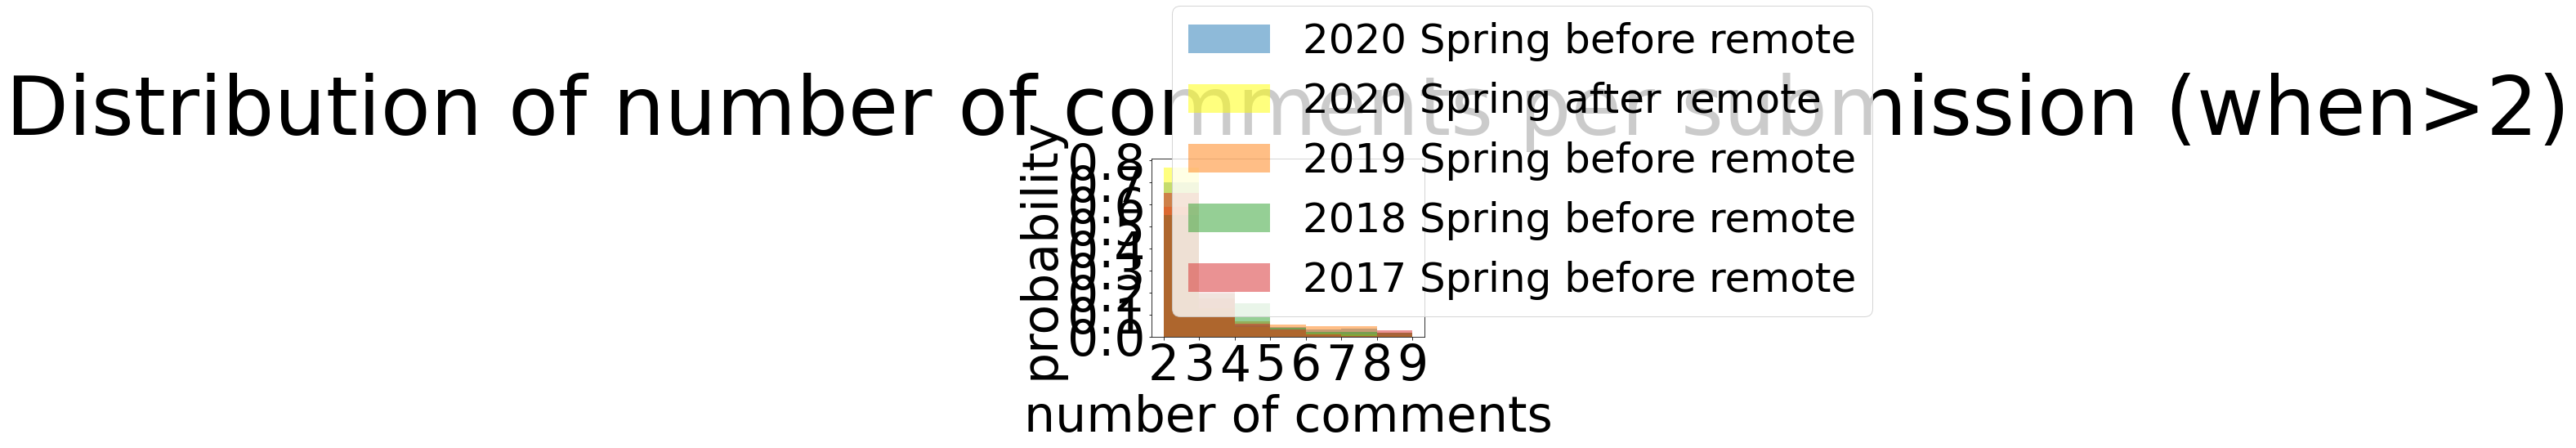

In [5]:
# distribution of number of comments by instructors per submission

# Spring 2020
before_count = []
group_before = comments_before_20.groupby('submission_id')
for i in group_before.groups.keys():
    before_count.append(len(group_before.get_group(i)))

after_count = []
group_after = comments_after_20.groupby('submission_id')
for i in group_after.groups.keys():
    after_count.append(len(group_after.get_group(i)))

plt.hist(before_count, bins=range(2, 10), density=True, alpha=0.5, label='2020 Spring before remote')
#plt.title('Distribution of number of comments per submission before and after covid (when>2)')
plt.hist(after_count, bins=range(2, 10), density=True, alpha=0.5, color='yellow', label='2020 Spring after remote')

# Spring 2019
count_19 = []
group_19 = comments_19.groupby('submission_id')
for i in group_19.groups.keys():
    count_19.append(len(group_19.get_group(i)))
plt.hist(count_19, bins=range(2, 10), density=True, alpha=0.5, label='2019 Spring before remote')

# Spring 2018
count_18 = []
group_18 = comments_18.groupby('submission_id')
for i in group_18.groups.keys():
    count_18.append(len(group_18.get_group(i)))
plt.hist(count_18, bins=range(2, 10), density=True, alpha=0.5, label='2018 Spring before remote')

# Spring 2017
count_17 = []
group_17 = comments_17.groupby('submission_id')
for i in group_17.groups.keys():
    count_17.append(len(group_17.get_group(i)))
plt.hist(count_17, bins=range(2, 10), density=True, alpha=0.5, label='2017 Spring before remote')


plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 90
fig_size[1] = 60
plt.rcParams["figure.figsize"] = fig_size
plt.title('Distribution of number of comments per submission (when>2)', fontsize=100, pad=30)
plt.xlabel('number of comments', fontsize=60)
plt.ylabel('probability', fontsize=60)
plt.legend(prop={'size': 50})
plt.show()


In [6]:
# average length of comments (in bytes)
# Spring 2020
group_before_20 = comments_before_20['message_size_bytes']
group_after_20 = comments_after_20['message_size_bytes']
print('Spring 2020 before covid:\n', group_before_20.describe())
print('Spring 2020 after covid:\n', group_after_20.describe())

# Spring 2019
group_before_19 = comments_before_19['message_size_bytes']
group_after_19 = comments_after_19['message_size_bytes']
print('Spring 2019 before cutoff date:\n', group_before_19.describe())
print('Spring 2019 after cutoff date:\n', group_after_19.describe())

# Spring 2020
group_before_18 = comments_before_18['message_size_bytes']
group_after_18 = comments_after_18['message_size_bytes']
print('Spring 2018 before cutoff date:\n', group_before_18.describe())
print('Spring 2018 after cutoff date:\n', group_after_18.describe())

# Spring 2020
group_before_17 = comments_before_17['message_size_bytes']
group_after_17 = comments_after_17['message_size_bytes']
print('Spring 2017 before cutoff date:\n', group_before_17.describe())
print('Spring 2017 after cutoff date:\n', group_after_17.describe())

Spring 2020 before covid:
 count    83090.000000
mean       202.932952
std        385.788654
min          1.000000
25%         23.000000
50%         49.000000
75%        218.000000
max       7569.000000
Name: message_size_bytes, dtype: float64
Spring 2020 after covid:
 count    123327.000000
mean        274.054473
std         519.831901
min           1.000000
25%          23.000000
50%         100.000000
75%         321.000000
max       60193.000000
Name: message_size_bytes, dtype: float64
Spring 2019 before cutoff date:
 count    126219.000000
mean        154.791481
std         312.211623
min           1.000000
25%          23.000000
50%          99.000000
75%         114.000000
max       13059.000000
Name: message_size_bytes, dtype: float64
Spring 2019 after cutoff date:
 count    194728.000000
mean        183.386005
std         357.960847
min           1.000000
25%          23.000000
50%         114.000000
75%         114.000000
max       13299.000000
Name: message_size_bytes, dtype

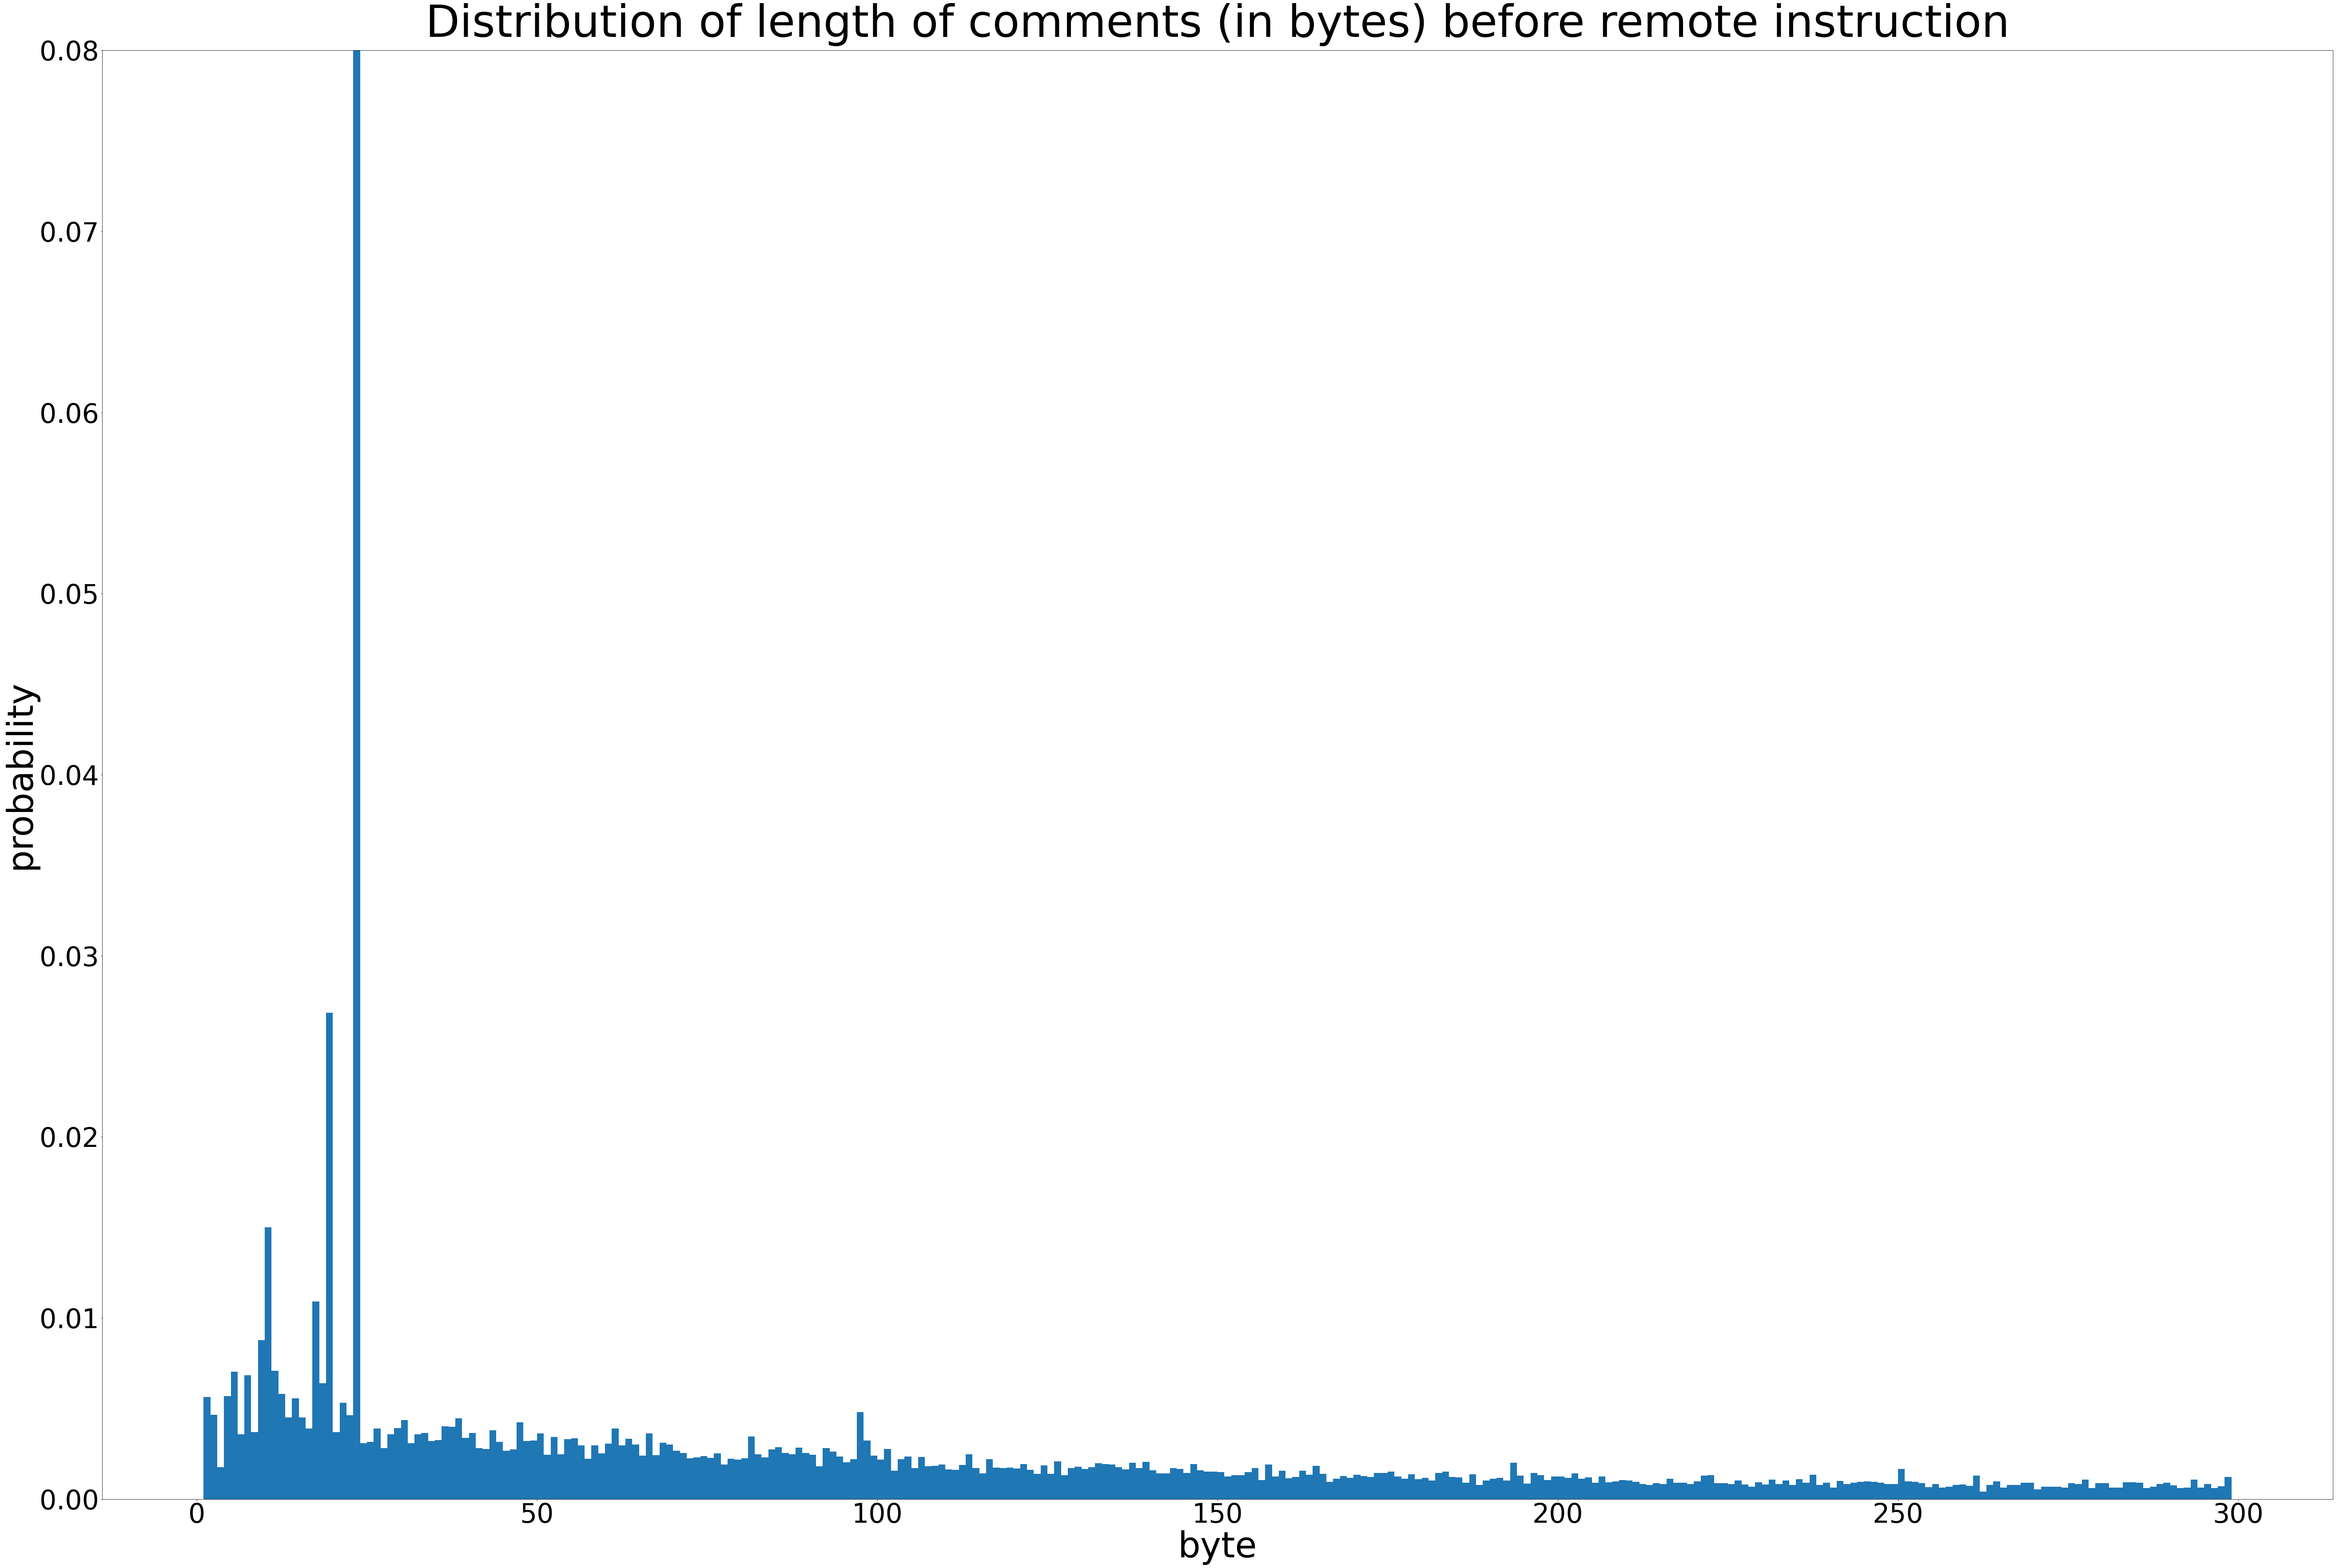

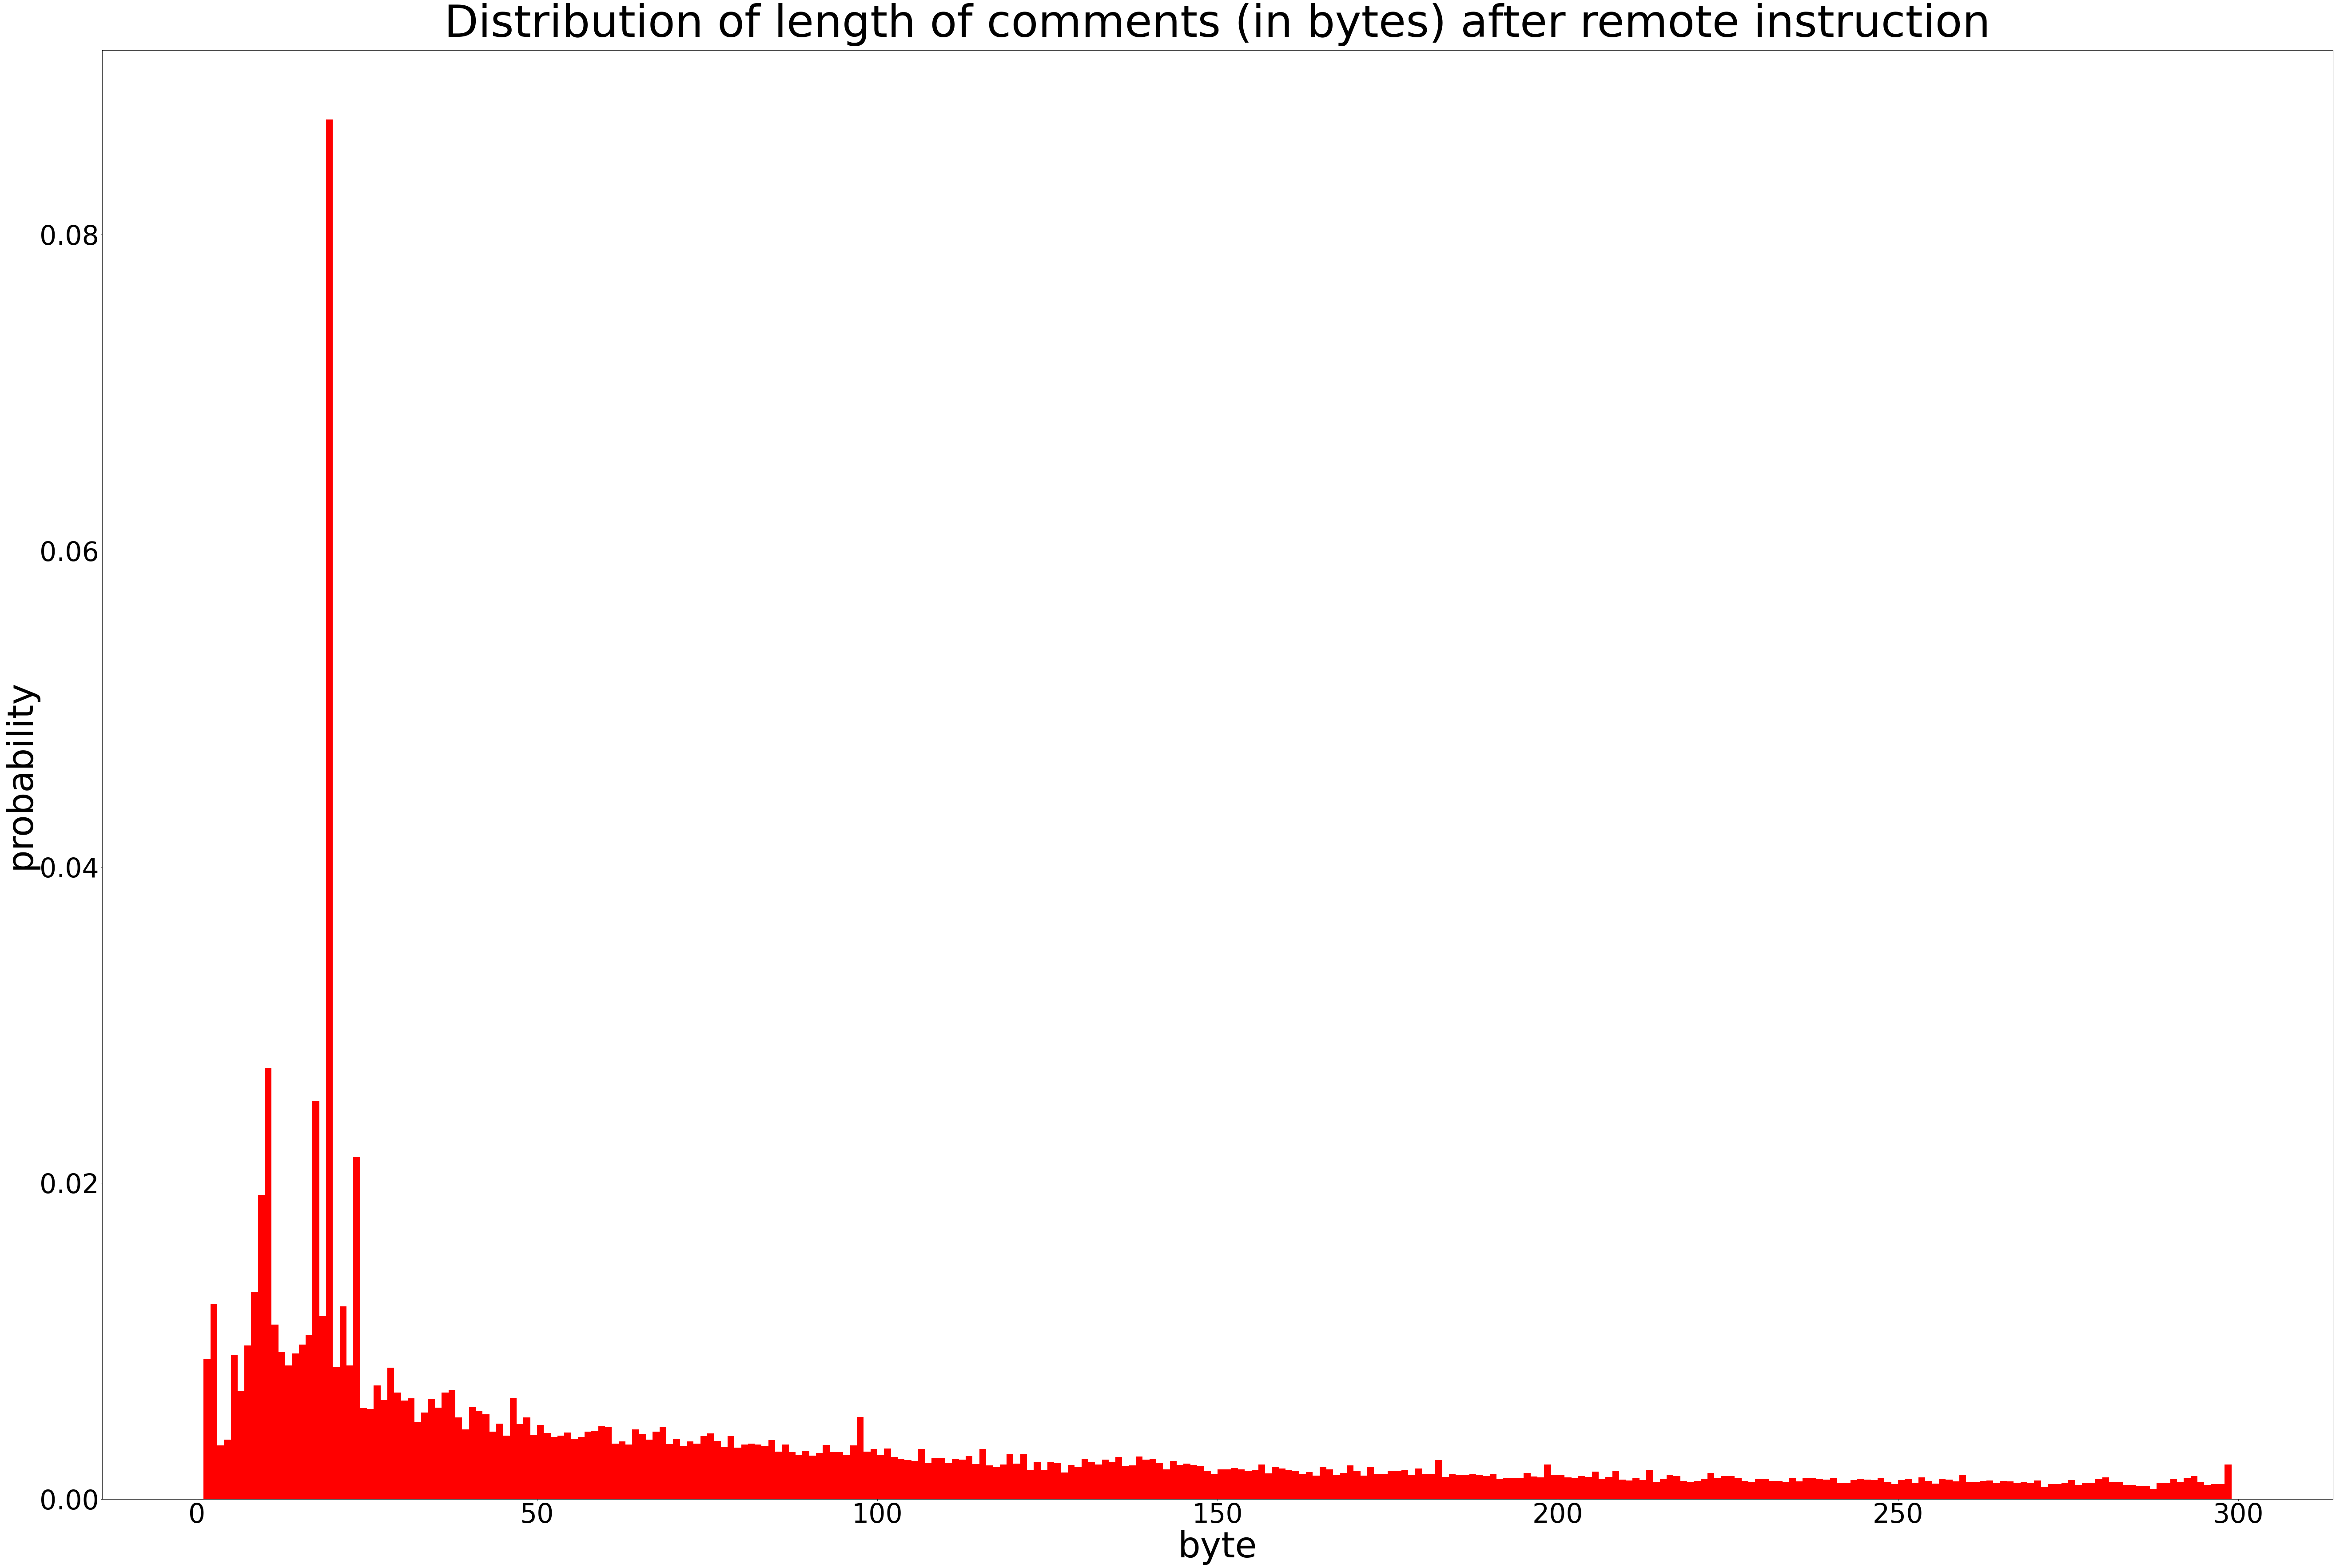

In [7]:

# distribution of comment length of Spring 2020
plt.hist(group_before_20, bins=range(1, 300), density=True)
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 90
fig_size[1] = 60
plt.rcParams["figure.figsize"] = fig_size
plt.ylim(0, 0.08)
plt.title('Distribution of length of comments (in bytes) before remote instruction', fontsize=100, pad=30)
plt.xlabel('byte', fontsize=80)
plt.ylabel('probability', fontsize=80)
plt.show()

plt.hist(group_after_20, bins=range(1, 300), density=True, color='red')
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 90
fig_size[1] = 60
plt.rcParams["figure.figsize"] = fig_size
plt.title('Distribution of length of comments (in bytes) after remote instruction', fontsize=100, pad=30)
plt.xlabel('byte', fontsize=80)
plt.ylabel('probability', fontsize=80)
plt.show()


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

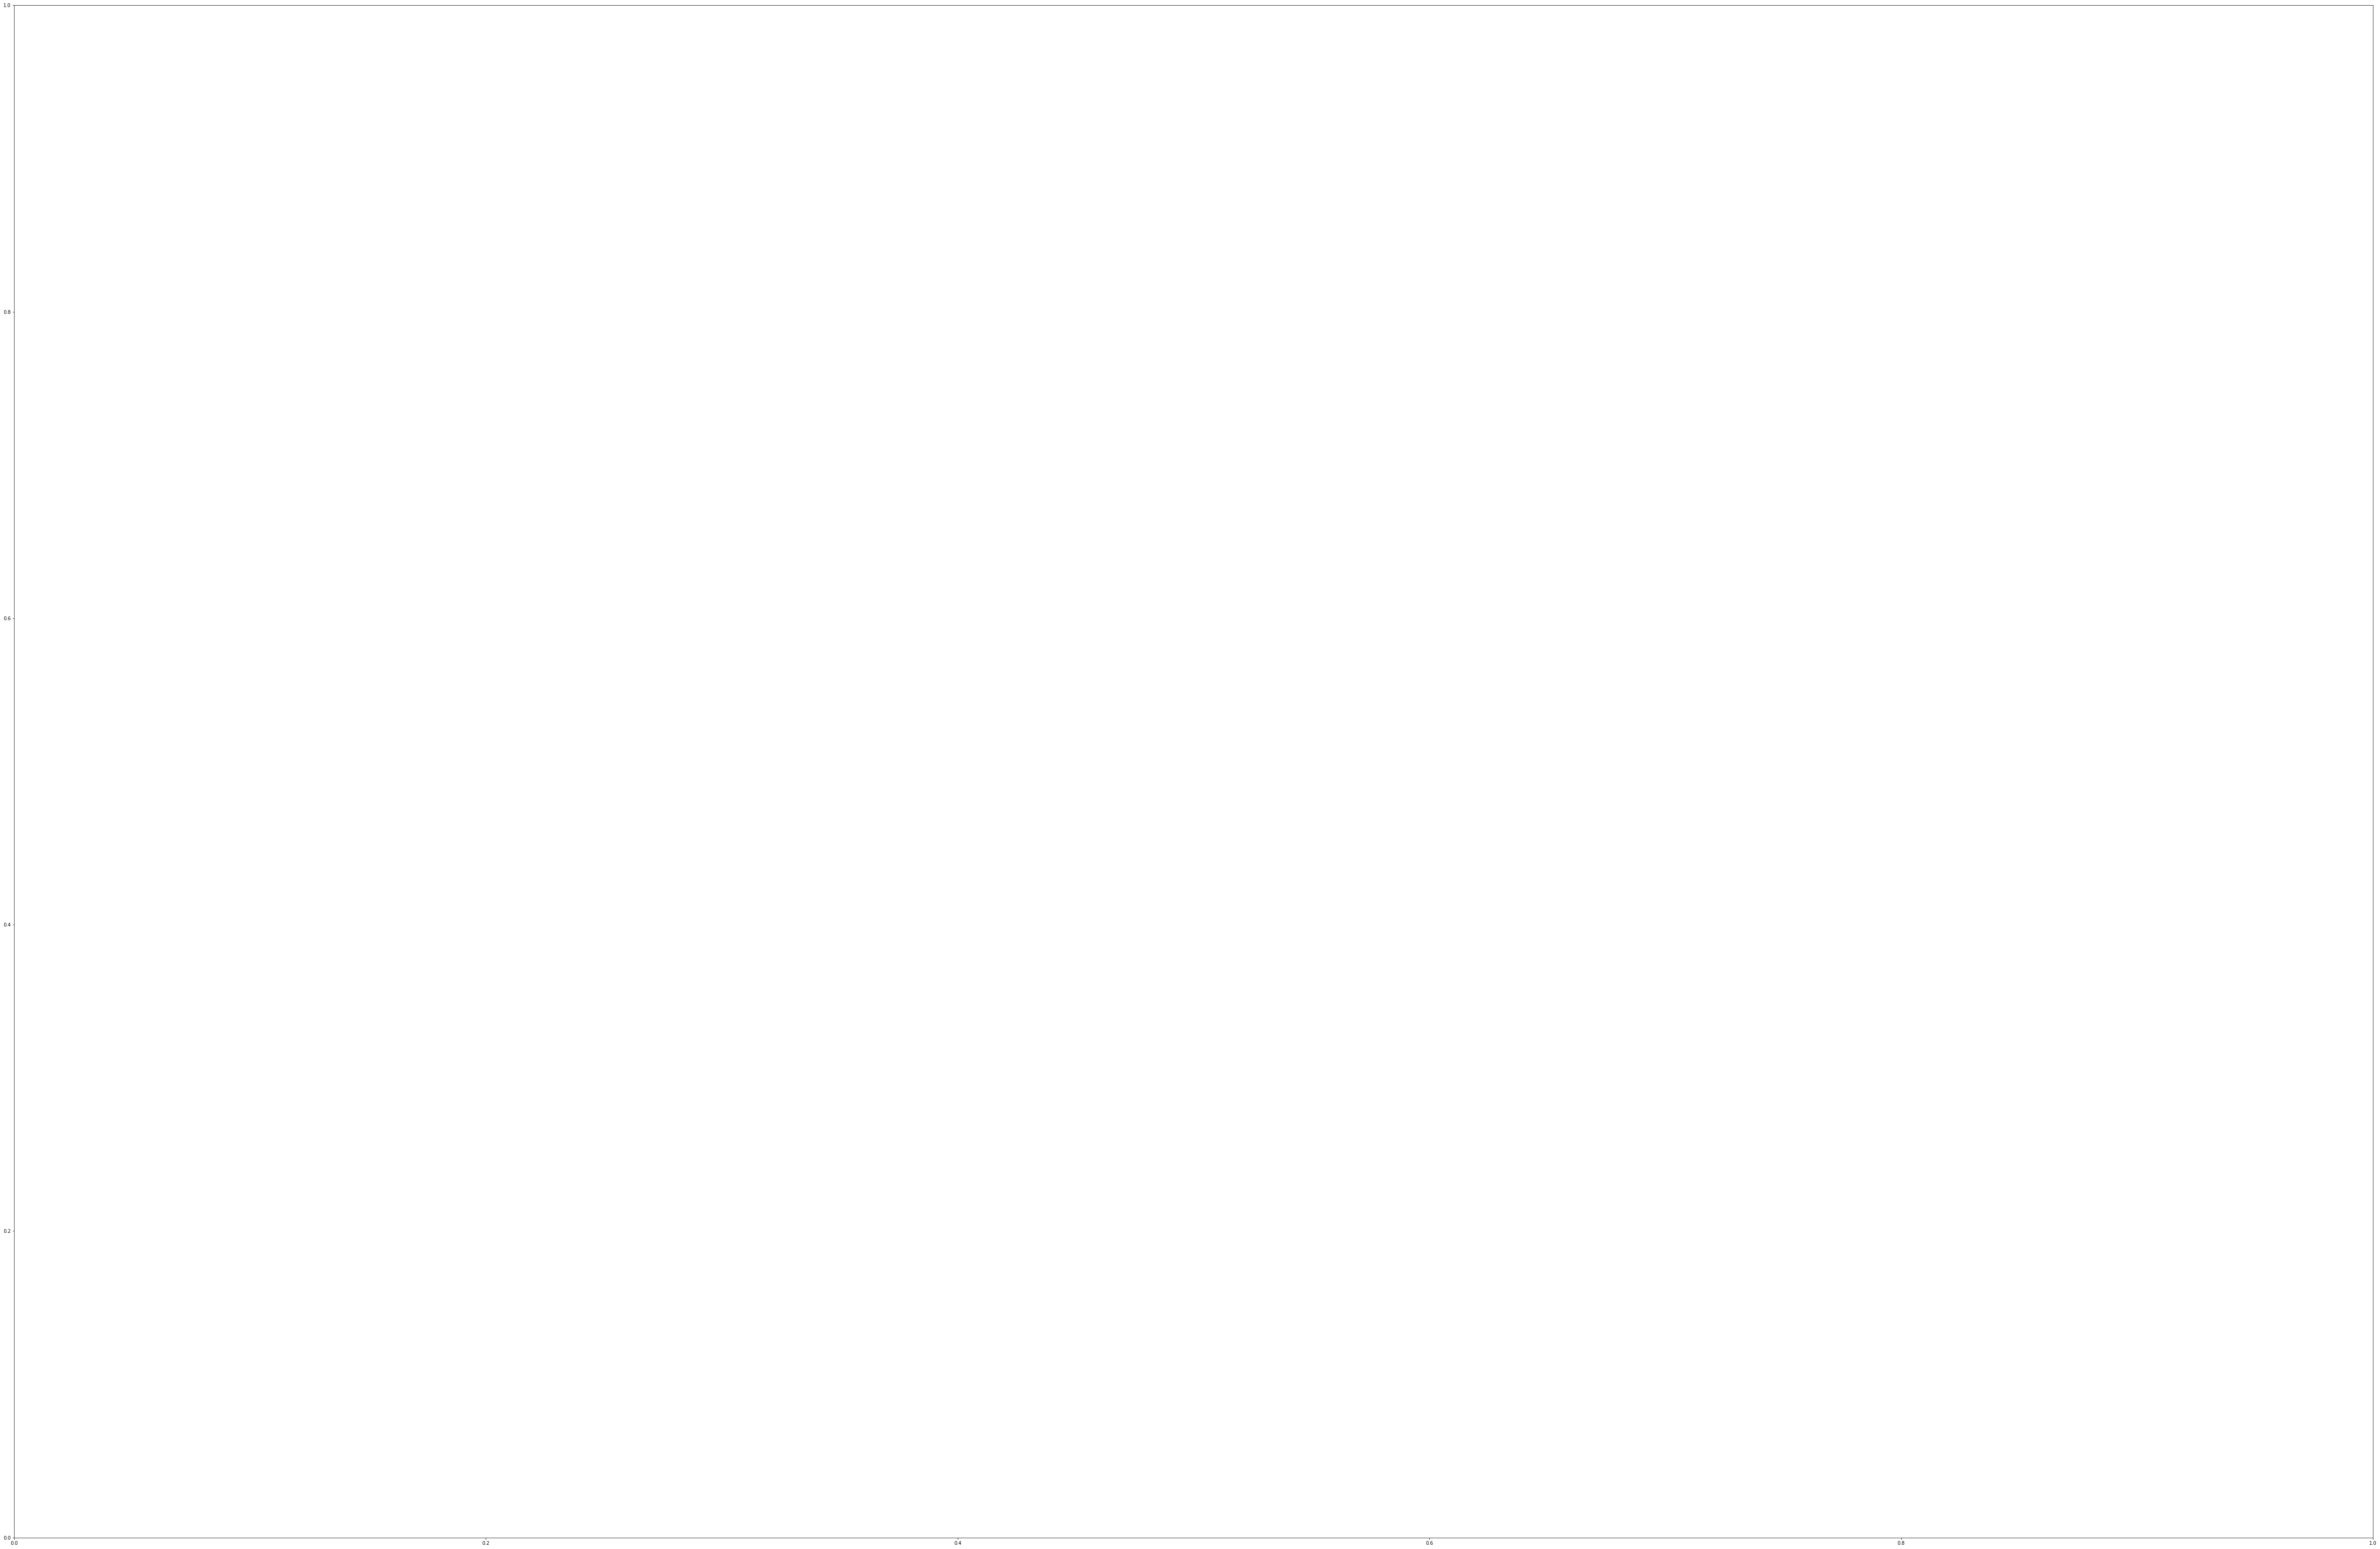

In [8]:
# distribution of comment length of Spring 2019
plt.hist(group_19, bins=range(1, 300), density=True)
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 90
fig_size[1] = 60
plt.rcParams["figure.figsize"] = fig_size
plt.ylim(0, 0.08)
plt.title('Distribution of length of comments (in bytes) of Spring 2019', fontsize=100, pad=30)
plt.xlabel('byte', fontsize=80)
plt.ylabel('probability', fontsize=80)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

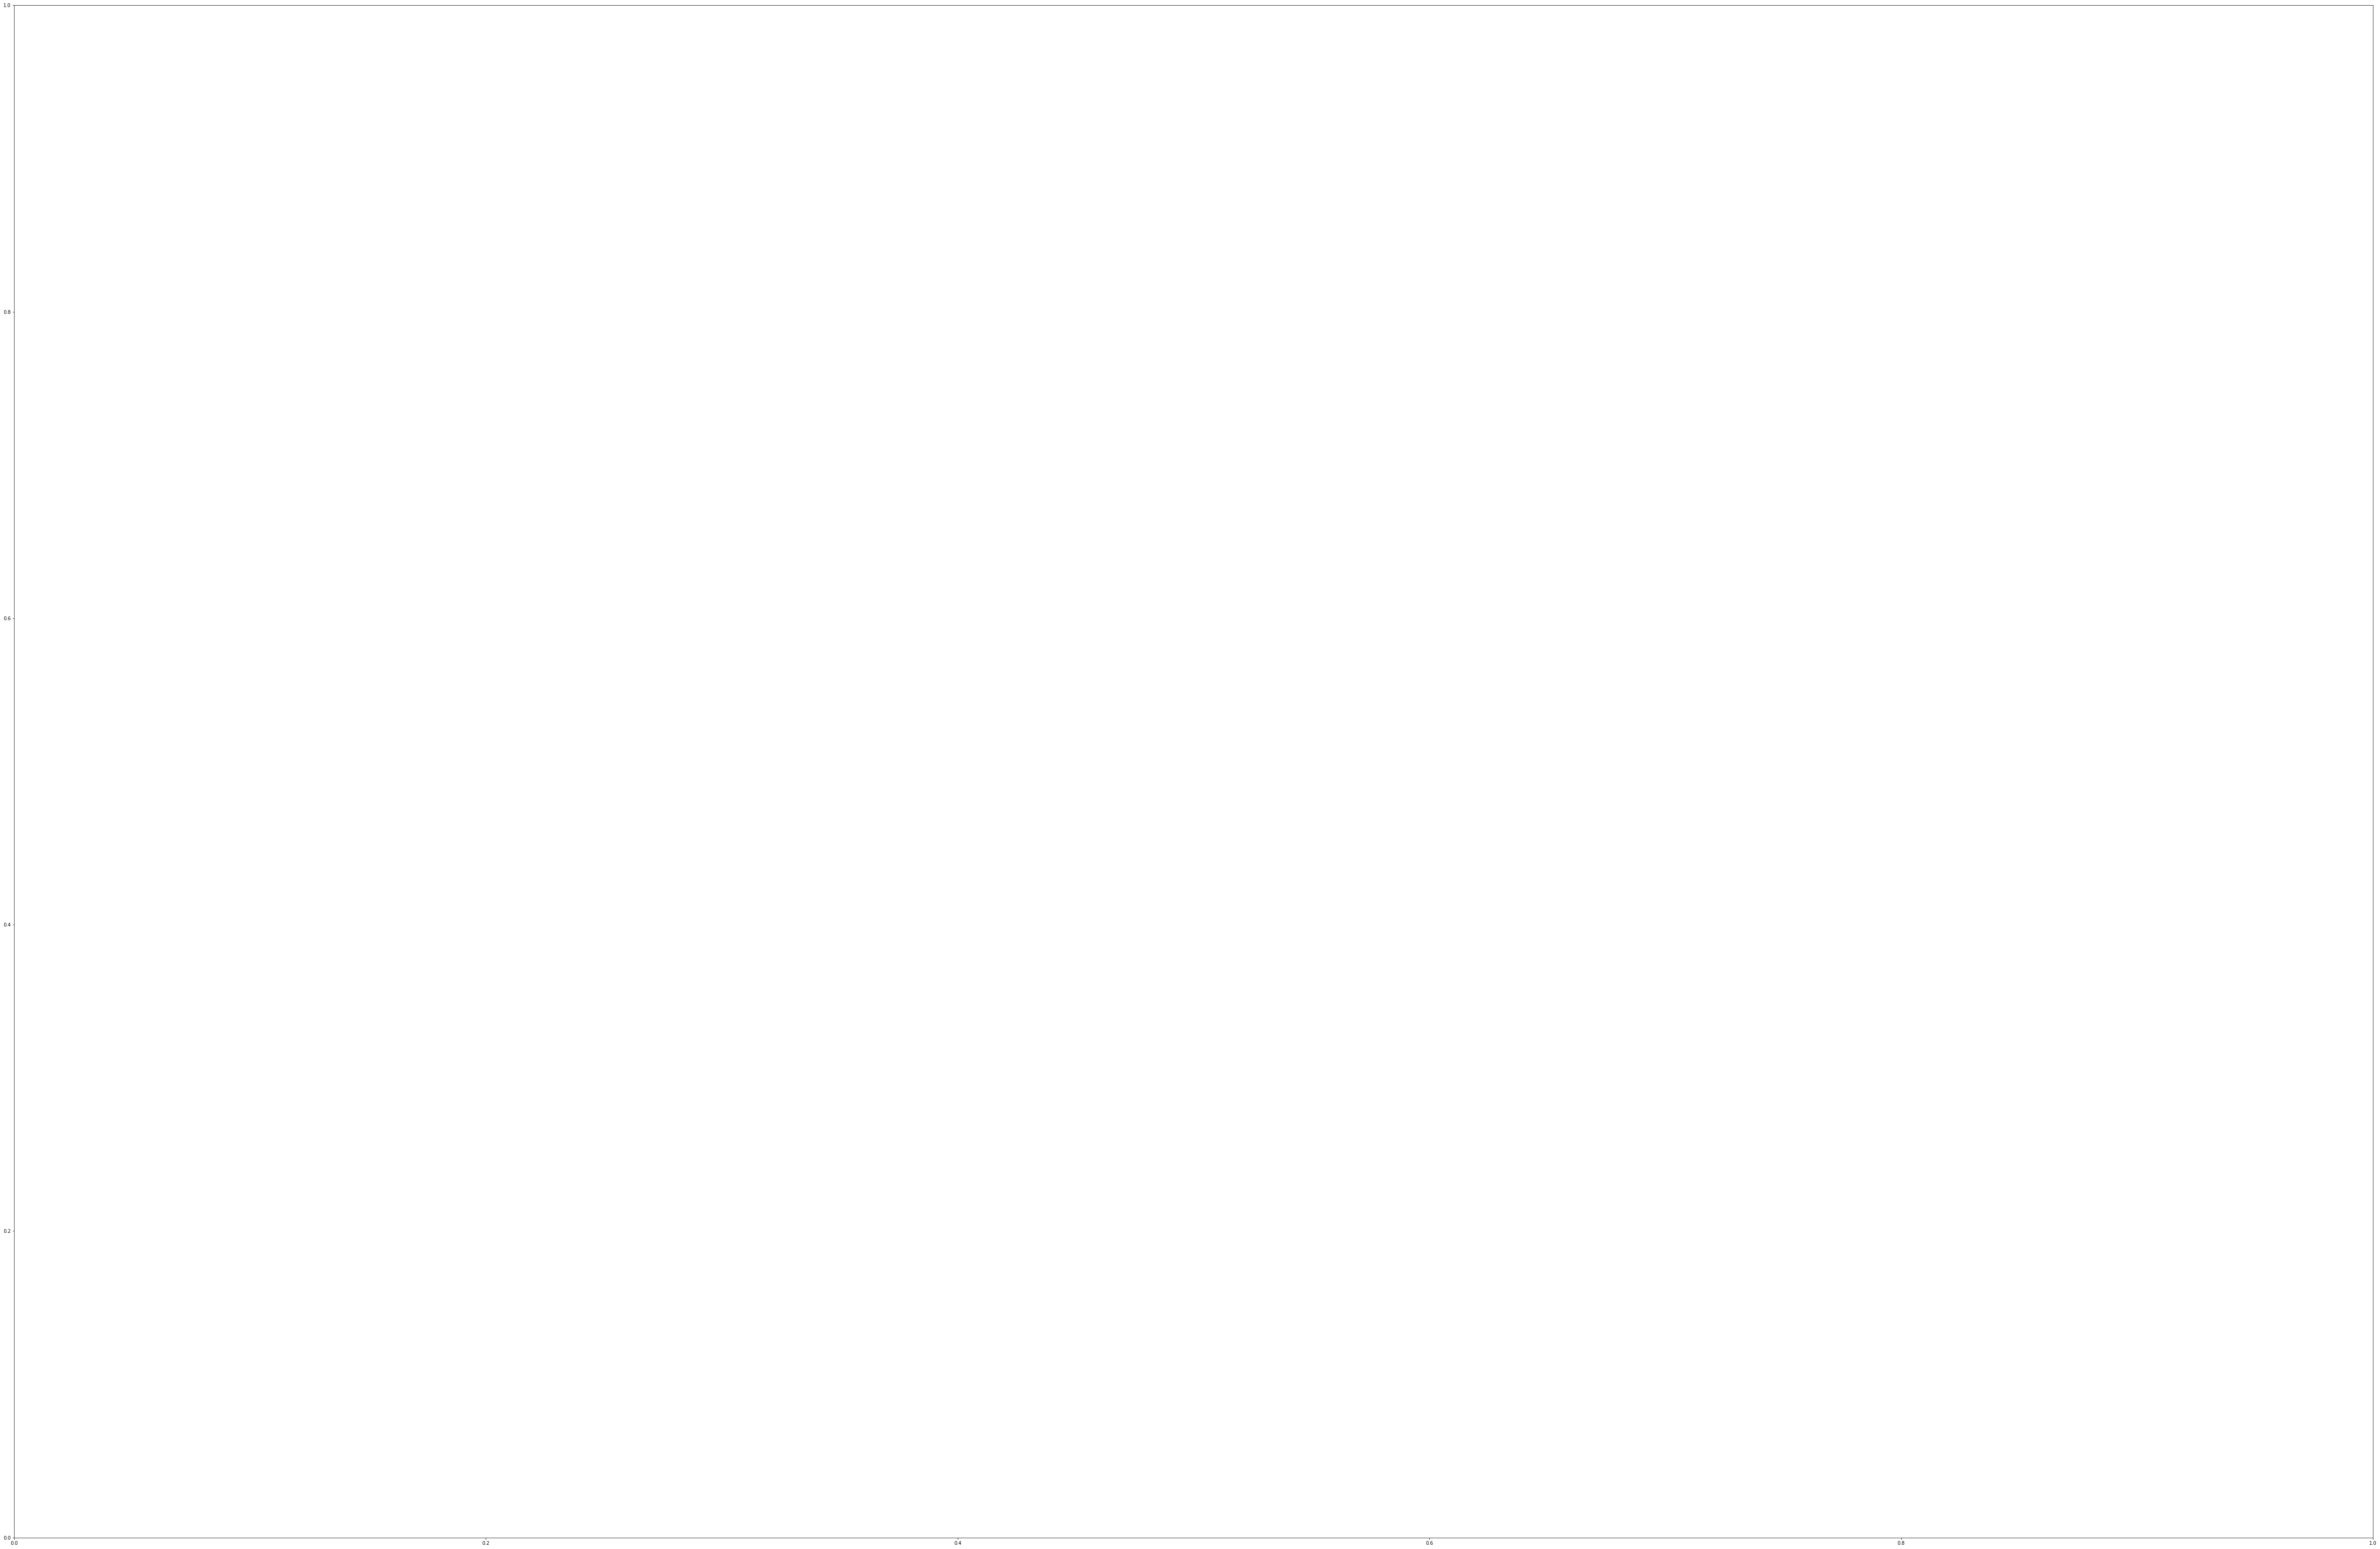

In [9]:
# distribution of comment length of Spring 2018
plt.hist(group_18, bins=range(1, 300), density=True)
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 90
fig_size[1] = 60
plt.rcParams["figure.figsize"] = fig_size
plt.ylim(0, 0.08)
plt.title('Distribution of length of comments (in bytes) of Spring 2018', fontsize=100, pad=30)
plt.xlabel('byte', fontsize=80)
plt.ylabel('probability', fontsize=80)
plt.show()

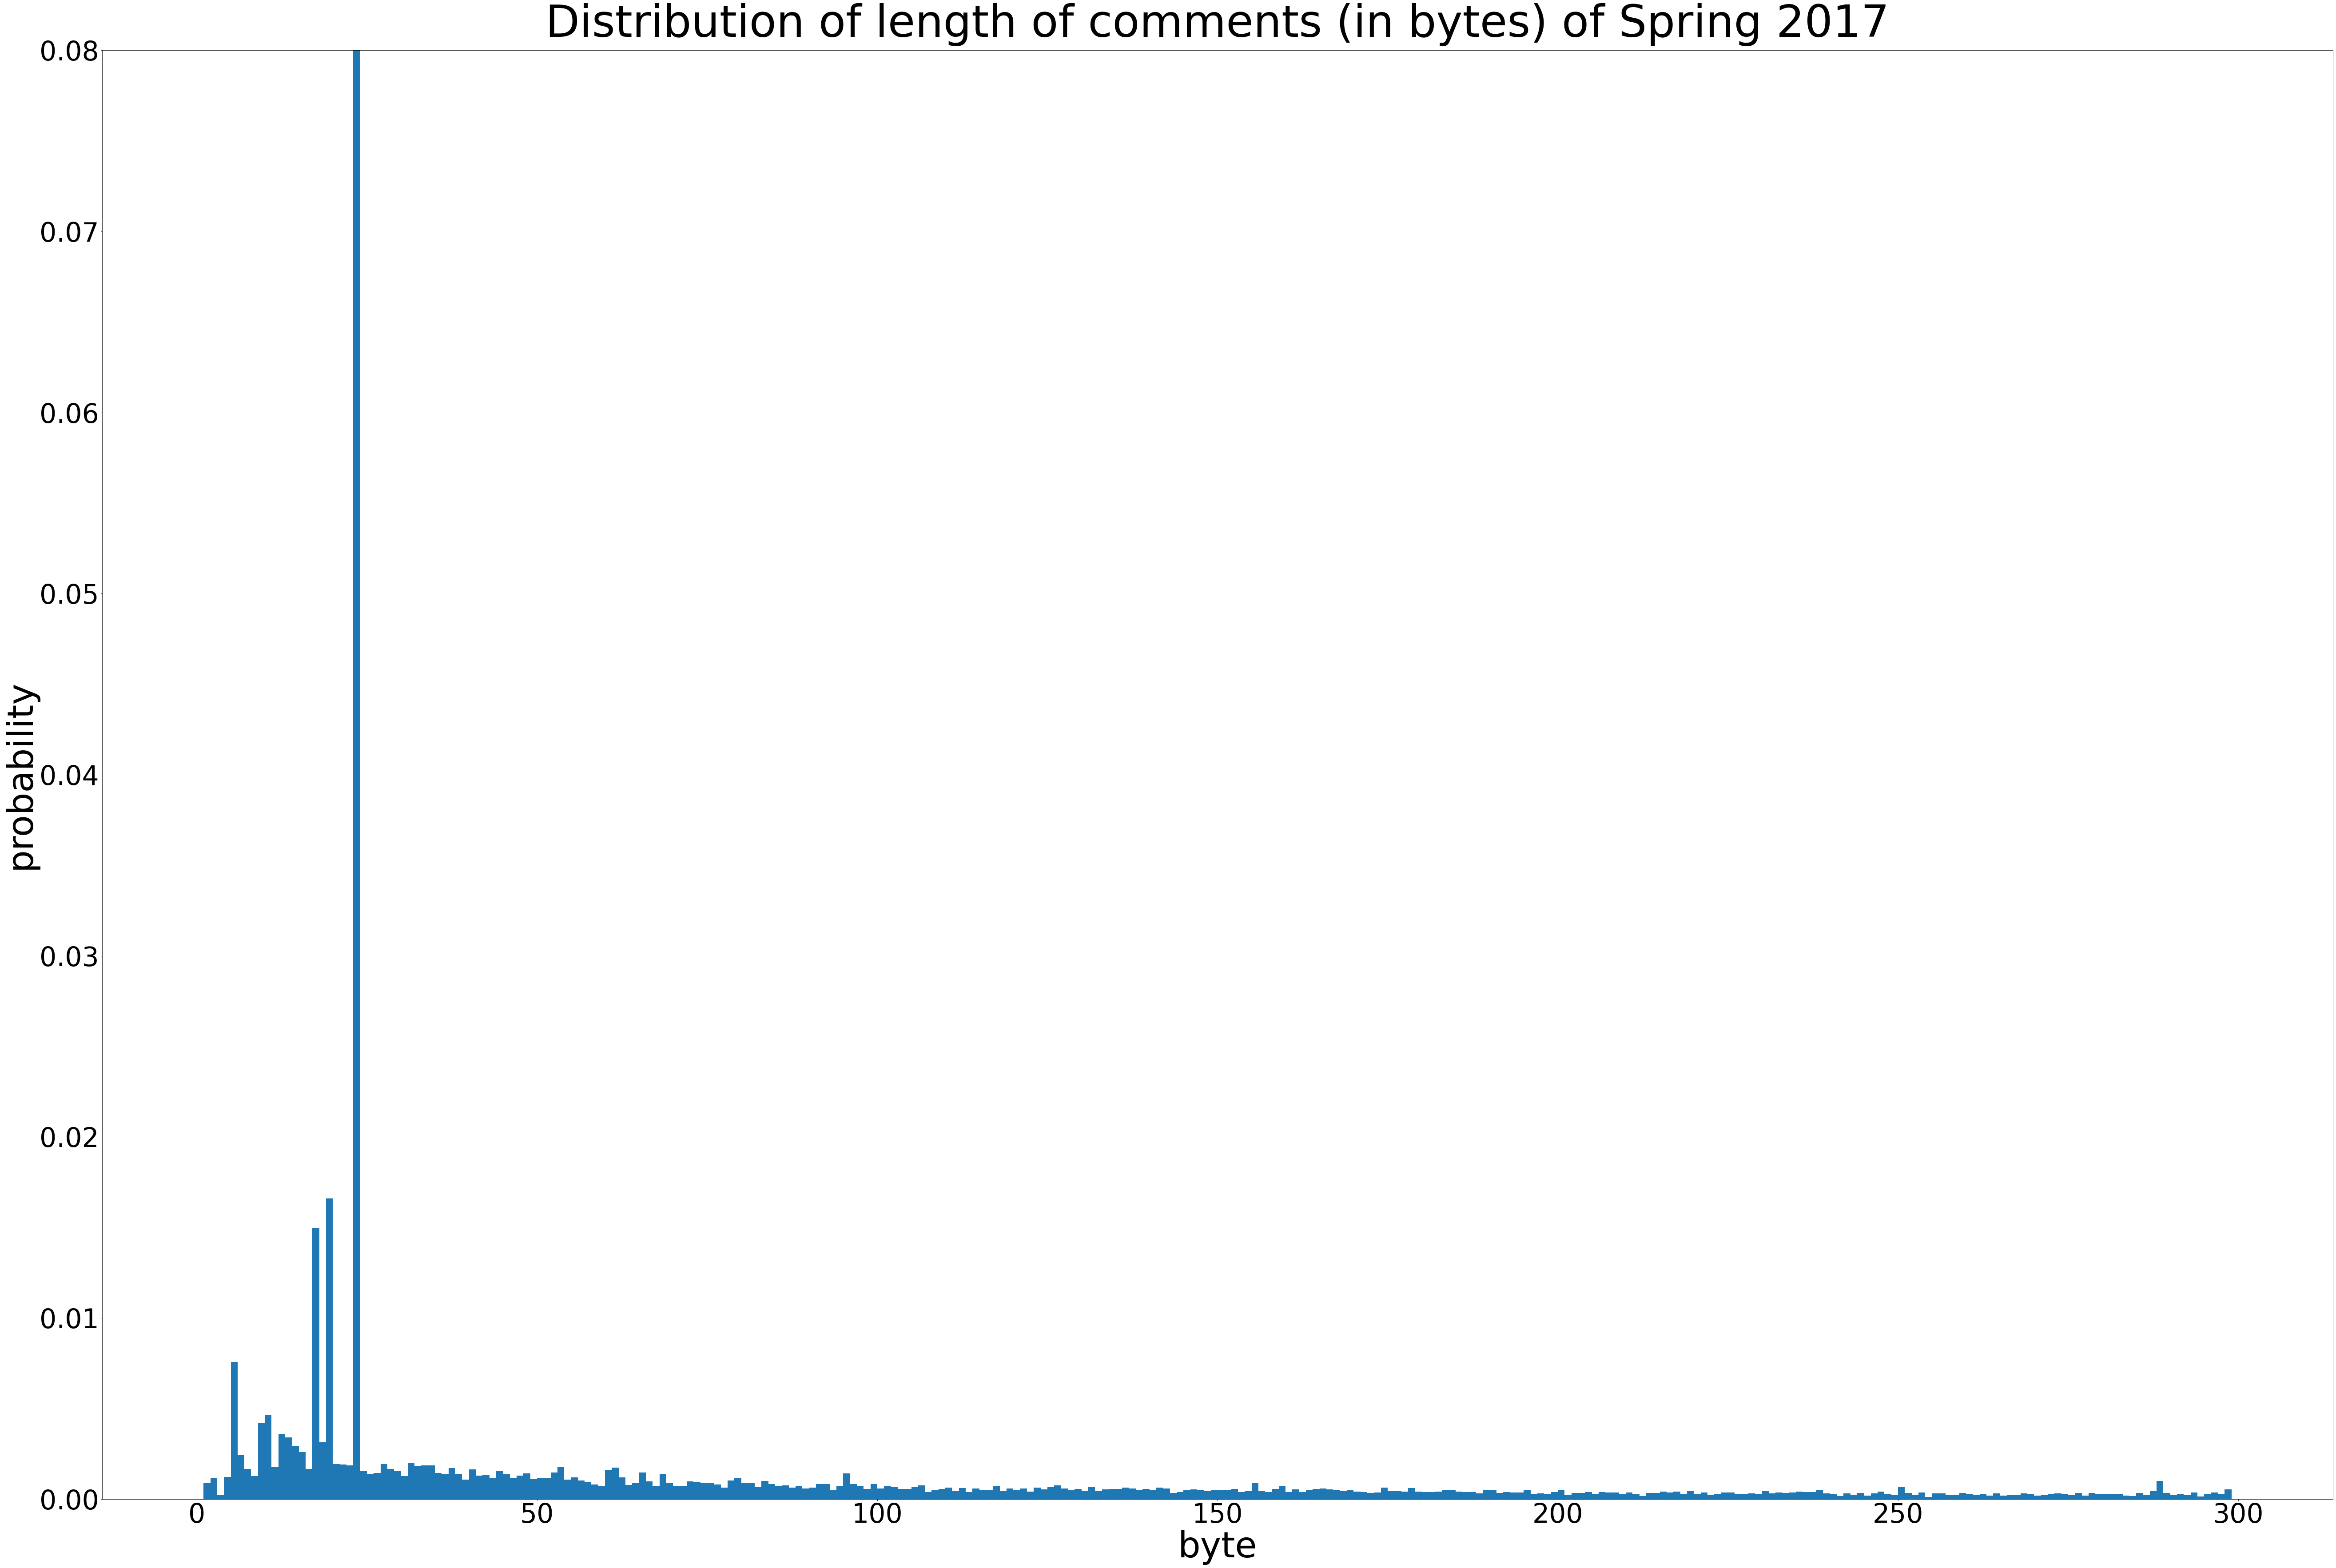

In [58]:
# distribution of comment length of Spring 2017
plt.hist(group_17, bins=range(1, 300), density=True)
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 90
fig_size[1] = 60
plt.rcParams["figure.figsize"] = fig_size
plt.ylim(0, 0.08)
plt.title('Distribution of length of comments (in bytes) of Spring 2017', fontsize=100, pad=30)
plt.xlabel('byte', fontsize=80)
plt.ylabel('probability', fontsize=80)
plt.show()